# It's seem like self-training network not doing well....

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
df_train = pd.read_csv('labels.csv')
df_test = pd.read_csv('sample_submission.csv')

In [4]:
df_train.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [5]:
typelist = df_test.columns
typelist = typelist[1:]

In [6]:
mapping = {typelist[i]:i for i in range(120)}

In [7]:
mapping

{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [8]:
df_train['breed'] = df_train['breed'].map(mapping)

In [9]:
df_train.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,19
1,001513dfcb2ffafc82cccf4d8bbaba97,37
2,001cdf01b096e06d78e9e5112d419397,85
3,00214f311d5d2247d5dfe4fe24b2303d,15
4,0021f9ceb3235effd7fcde7f7538ed62,49


In [10]:
y_train = df_train['breed'].as_matrix()

In [11]:
y_train

array([19, 37, 85, ...,  3, 75, 28])

In [12]:
name_test = df_train['id'].iloc[0]

In [13]:
df_test.columns

Index(['id', 'affenpinscher', 'afghan_hound', 'african_hunting_dog',
       'airedale', 'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset',
       ...
       'toy_poodle', 'toy_terrier', 'vizsla', 'walker_hound', 'weimaraner',
       'welsh_springer_spaniel', 'west_highland_white_terrier', 'whippet',
       'wire-haired_fox_terrier', 'yorkshire_terrier'],
      dtype='object', length=121)

In [14]:
name_test

'000bec180eb18c7604dcecc8fe0dba07'

# Skip to Load File

In [22]:
M = Image.open('train/{}.jpg'.format(name_test))

In [23]:
M_mirror = np.flip(M,1)

In [27]:
!PIL.__version__

/bin/sh: 1: PIL.__version__: not found


In [30]:
M.size

(500, 375)

In [47]:
imsize = 100

In [54]:
a,b = np.random.randint(500-imsize),np.random.randint(375-imsize)
M_show = np.array(M)[a:a+imsize,b:b+imsize]

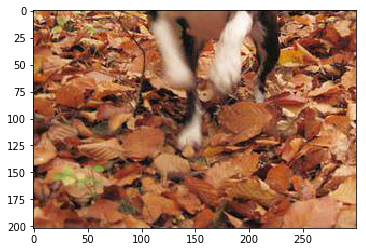

In [55]:
plt.imshow(M_show)
plt.show()

In [17]:
N = len(df_train['id'])
N

10222

In [18]:
imsize = 100
X_train = np.zeros((N,imsize,imsize,3))

In [19]:
for index,name in enumerate(df_train['id']):
    M = Image.open('train/{}.jpg'.format(name))
    M = M.resize((imsize,imsize))
    X_train[index] = np.asarray(M)

In [20]:
N_test = len(df_test['id'])
X_test = np.zeros((N_test,imsize,imsize,3))

for index,name in enumerate(df_test['id']):
    M = Image.open('test/{}.jpg'.format(name))
    M = M.resize((imsize,imsize))
    X_test[index] = np.asarray(M)

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4412807590433978580, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 51380224
 locality {
   bus_id: 1
 }
 incarnation: 17242492710203300406
 physical_device_desc: "device: 0, name: GeForce GTX 960M, pci bus id: 0000:02:00.0, compute capability: 5.0"]

In [21]:
np.save('X_train', X_train)

In [22]:
np.save('X_test', X_test)

# Load File

In [15]:
X_data = np.load('X_train.npy')

In [17]:
#normalize
mean_image = X_data.mean(axis=0)
X_data -= mean_image
#y_train = np.concatenate([y_train,y_train],axis=0)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_train, test_size=0.20, random_state=42)
del X_data

In [18]:
X_test = np.load('X_test.npy')
X_test -= mean_image

In [25]:
# X_train_mirror = np.flip(X_train,1)
# X_train = np.concatenate([X_train, X_train_mirror], axis=0)

In [19]:
len(X_val), len(y_val)

(2045, 2045)

In [57]:
y_train.shape

(8177,)

In [22]:
imsize = X_train.shape[1]
imsize

100

In [189]:
sess.graph

In [149]:
def easy_model(X,y, dropout = 0.5, reg_str=1e-3):
    reg = 0
    eps = tf.constant(10e-5)
    with tf.variable_scope('layer0'):
        X = tf.contrib.layers.conv2d(X,stride=1,num_outputs=10,kernel_size=[2,2],
                                     padding='SAME',normalizer_fn=tf.contrib.layers.batch_norm,
                                     weights_regularizer=reg)
    with tf.variable_scope('layer2'):
        X = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding='VALID',data_format='NHWC')
    with tf.variable_scope('layer3'):
        X = tf.contrib.layers.conv2d(X,stride=1,num_outputs=32,kernel_size=[2,2],
                                     padding='SAME',normalizer_fn=tf.contrib.layers.batch_norm,
                                    weights_regularizer=reg)

    with tf.variable_scope('layer5'):
        X = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1],padding='VALID',data_format='NHWC')
    with tf.variable_scope('layer6'):
        D = imsize * imsize * 2
        X = tf.reshape(X,[-1,D])
        X = tf.contrib.layers.fully_connected(X,num_outputs=1000,normalizer_fn=tf.contrib.layers.batch_norm,
                                             weights_regularizer=reg)
    with tf.variable_scope('layer7'):
        if is_training is not None:
            X = tf.nn.dropout(X, keep_prob=dropout)

    with tf.variable_scope('layer9'):
        X = tf.contrib.layers.fully_connected(X,num_outputs=500,normalizer_fn=tf.contrib.layers.batch_norm,
                                             weights_regularizer=reg)
        if is_training is not None:
            X = tf.nn.dropout(X, keep_prob=dropout)
    with tf.variable_scope('layer10'):
        X = tf.contrib.layers.fully_connected(X,num_outputs=120,activation_fn=None)
    return X

In [186]:
def solver(sess, predict, Xin, yin, epochs = 20, batch_size=100,print_every=100,training=None):
    correct_score = tf.equal(tf.argmax(predict,1),y)
    acc = tf.reduce_sum(tf.cast(correct_score, tf.float32))
    N = Xin.shape[0]
    train_indicies = np.arange(N)
    np.random.shuffle(train_indicies)
    iter_count = 0
    all_losses = []
    return_parameter = [mean_loss,acc,correct_score]
    if training is not None:
        return_parameter[-1] = training
    for epoch in range(epochs):
        correct = 0
        losses = []
        for i in range(int(np.ceil(N/batch_size))):
            start_idx = i * batch_size % N
            chose_indices = train_indicies[start_idx:start_idx + batch_size]
            X_batch = Xin[chose_indices,:]
            y_batch = yin[chose_indices]
            feed_dict = {X:X_batch, y:y_batch,is_training:training}
            actual_size = y_batch.shape[0]
            loss, accuracy,_ = sess.run(return_parameter,feed_dict=feed_dict)
            correct += accuracy
            losses.append(loss * actual_size)
            iter_count += 1
            if iter_count % print_every == 0:
#                 train_writer.add_summary(summary,i)
                print('your loss is {} and correct {}'.format(loss,accuracy/batch_size))
        total_loss = np.sum(losses)/N
        total_correct = correct/N
        print('Epoch {}: loss is {} acc is {}'.format(epoch, total_loss, total_correct))
    return total_loss, total_correct
        

In [192]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32,[None,imsize,imsize,3])
y = tf.placeholder(tf.int64,[None])
is_training = tf.placeholder(tf.bool)
y_out = easy_model(X,y)
reg = tf.contrib.layers.l2_regularizer(scale=3e-3)
mean_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf.one_hot(y,120), logits=y_out))
optimizer = tf.train.AdamOptimizer(1e-2)
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(extra_update_ops):
    train_step = optimizer.minimize(mean_loss)
sess = tf.Session()
train_writer = tf.summary.FileWriter('/home/barnrang/Documents/Github/Competition/DogBreed/trainxxx', sess.graph)
sess.run(tf.global_variables_initializer())
print('Training')
solver(sess, y_out, X_train, y_train, epochs = 1, batch_size=100,print_every=10,training=train_step)

Training
your loss is 5.724747180938721 and correct 0.01
your loss is 5.494487285614014 and correct 0.0
your loss is 5.612957000732422 and correct 0.0
your loss is 5.294629096984863 and correct 0.02
your loss is 5.504556655883789 and correct 0.01
your loss is 5.541780948638916 and correct 0.0
your loss is 5.2455830574035645 and correct 0.04
your loss is 5.4168806076049805 and correct 0.04
Epoch 0: loss is 5.495009201057269 acc is 0.009538950715421303


(5.4950092010572691, 0.009538950715421303)

In [155]:
X_train = np.flip(X_train,axis=1)
solver(sess, y_out, X_train, y_train, epochs = 20, batch_size=100,print_every=10,training=train_step)

your loss is 3.3922338485717773 and correct 0.26
your loss is 3.56852388381958 and correct 0.21
your loss is 3.3692467212677 and correct 0.26
your loss is 3.242213726043701 and correct 0.26
your loss is 3.2404279708862305 and correct 0.28
your loss is 3.196136713027954 and correct 0.27
your loss is 3.270632743835449 and correct 0.28
your loss is 3.192479133605957 and correct 0.26
Epoch 0: loss is 3.3242327354058405 acc is 0.23174758468876117
your loss is 2.8810219764709473 and correct 0.35
your loss is 2.937002182006836 and correct 0.39
your loss is 2.9644412994384766 and correct 0.28
your loss is 3.218601703643799 and correct 0.23
your loss is 2.997786283493042 and correct 0.29
your loss is 2.8999240398406982 and correct 0.35
your loss is 2.8310630321502686 and correct 0.37
your loss is 3.150456428527832 and correct 0.3
Epoch 1: loss is 3.0183273747014843 acc is 0.3032897150544209
your loss is 3.072768449783325 and correct 0.32
your loss is 2.937284231185913 and correct 0.35
your loss

your loss is 1.0823341608047485 and correct 0.89
your loss is 1.3108035326004028 and correct 0.81
your loss is 1.0830363035202026 and correct 0.88
your loss is 1.102655291557312 and correct 0.83
your loss is 1.086039423942566 and correct 0.89
your loss is 1.1754411458969116 and correct 0.88
your loss is 1.1402287483215332 and correct 0.9
your loss is 1.0300387144088745 and correct 0.86
Epoch 18: loss is 1.1366564207516134 acc is 0.8651094533447474
your loss is 1.1399469375610352 and correct 0.85
your loss is 1.0849329233169556 and correct 0.87
your loss is 1.0737693309783936 and correct 0.87
your loss is 1.1065007448196411 and correct 0.88
your loss is 1.000524878501892 and correct 0.93
your loss is 1.0223071575164795 and correct 0.92
your loss is 1.1793323755264282 and correct 0.82
your loss is 1.1243056058883667 and correct 0.89
your loss is 0.9570800065994263 and correct 0.72
Epoch 19: loss is 1.0704557792881204 acc is 0.8844319432554727


(1.0704557792881204, 0.8844319432554727)

In [156]:
solver(sess, y_out, X_val, y_val, epochs=1, batch_size=100)

Epoch 0: loss is 5.106615058367293 acc is 0.040097799511002445


(5.1066150583672929, 0.040097799511002445)

In [157]:
solver(sess, y_out, X_train, y_train, epochs=1, batch_size=100)

Epoch 0: loss is 1.0925981608611586 acc is 0.8731808731808732


(1.0925981608611586, 0.87318087318087323)

In [158]:
tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)

'trainable_variables'